#**Hello in this project

In [1]:
!nvidia-smi

Mon Sep  2 14:08:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="K8L66wXHMGvf0aeOrQLe")
project = rf.workspace("tennis-ai").project("football-boxes")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to football-boxes-1 in yolov8:: 100%|██████████| 1334/1334 [00:00<00:00, 3168.91it/s]


In [4]:
!pwd

/content


In [6]:
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 22.8 MB/s eta 0:00:00


In [9]:
model = YOLO("yolov8n-seg.pt")
model.train(data="/content/football-boxes-1/data.yaml", epochs=25,imgsz=640)

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/football-boxes-1/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 21.8MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 133MB/s]


AMP: checks passed ✅


`torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
train: Scanning /content/football-boxes-1/train/labels... 576 images, 0 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1492.27it/s]


train: New cache created: /content/football-boxes-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/football-boxes-1/valid/labels... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:00<00:00, 704.59it/s]

val: New cache created: /content/football-boxes-1/valid/labels.cache


Plotting labels to runs/segment/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/25      3.18G     0.8264      2.733      3.097      1.243        156        640: 100%|██████████| 36/36 [00:22<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all         54        235     0.0372       0.81      0.363      0.318     0.0378      0.862      0.357      0.288



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/25      2.99G     0.5659     0.8989      1.703      1.036        143        640: 100%|██████████| 36/36 [00:13<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         54        235      0.584      0.455      0.517      0.433      0.584      0.455      0.503      0.417



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/25      3.01G      0.535     0.7488      1.383      1.005        121        640: 100%|██████████| 36/36 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.14it/s]

                   all         54        235      0.619      0.861      0.722      0.628      0.619      0.861       0.72      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/25      2.97G     0.4768     0.6504      1.238     0.9775        136        640: 100%|██████████| 36/36 [00:13<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.18s/it]

                   all         54        235      0.612      0.906      0.721      0.624      0.612      0.906      0.719      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/25      3.06G     0.4609     0.6103      1.175     0.9543        158        640: 100%|██████████| 36/36 [00:13<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         54        235      0.637      0.893      0.746      0.674      0.633      0.884      0.738      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/25      2.98G     0.4271     0.5203      1.062     0.9489        133        640: 100%|██████████| 36/36 [00:13<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.06it/s]

                   all         54        235      0.693      0.924       0.79      0.721      0.689       0.92       0.79      0.708



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/25      3.05G     0.4124     0.5558      1.023     0.9433        161        640: 100%|██████████| 36/36 [00:13<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.03s/it]

                   all         54        235      0.736      0.918       0.86      0.798      0.732      0.916       0.85      0.787



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/25         3G     0.3899     0.5473     0.9667     0.9306        179        640: 100%|██████████| 36/36 [00:13<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.11s/it]

                   all         54        235      0.745      0.889      0.889      0.849      0.745      0.889       0.89      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/25      3.05G      0.388     0.4967     0.9137      0.928        116        640: 100%|██████████| 36/36 [00:13<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.02it/s]

                   all         54        235      0.738      0.892      0.838      0.771      0.738      0.892      0.838      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/25      3.03G     0.3758     0.4658     0.8642     0.9248        135        640: 100%|██████████| 36/36 [00:13<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.12s/it]

                   all         54        235       0.85      0.912      0.936      0.885      0.847      0.909      0.933      0.883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/25      2.96G     0.3593     0.4478      0.784     0.9164        127        640: 100%|██████████| 36/36 [00:13<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         54        235      0.825      0.888      0.881      0.835      0.825      0.888      0.877       0.83



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/25      3.04G     0.3634     0.4739     0.7668     0.9164        127        640: 100%|██████████| 36/36 [00:13<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         54        235      0.946      0.941      0.974      0.929      0.946      0.941      0.974      0.912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/25      2.99G     0.3497     0.4222     0.7296     0.9104        152        640: 100%|██████████| 36/36 [00:13<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.04s/it]

                   all         54        235      0.939      0.951      0.967      0.928      0.939      0.951      0.967      0.914



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/25      3.02G      0.338     0.4285     0.6975     0.9066        155        640: 100%|██████████| 36/36 [00:13<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         54        235      0.926      0.925      0.962       0.92      0.926      0.925      0.962      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/25      2.97G     0.3307     0.3871     0.6626     0.8985        151        640: 100%|██████████| 36/36 [00:13<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.00it/s]

                   all         54        235      0.905      0.948      0.963      0.922      0.898       0.94      0.958      0.906


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/25      2.82G     0.3723     0.5108     0.7831     0.9228         64        640: 100%|██████████| 36/36 [00:16<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         54        235      0.934      0.919       0.97      0.934      0.934      0.919       0.97       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/25      2.81G     0.3314     0.4116     0.6466     0.8938         66        640: 100%|██████████| 36/36 [00:12<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.45it/s]

                   all         54        235       0.93      0.952      0.956      0.923       0.93      0.952      0.956      0.911



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/25      2.82G     0.3341     0.4408     0.6391     0.8891         72        640: 100%|██████████| 36/36 [00:11<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         54        235      0.932      0.956      0.965      0.927      0.927      0.947      0.965      0.925



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/25      2.81G     0.3167     0.4263     0.5944     0.8856         63        640: 100%|██████████| 36/36 [00:12<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]

                   all         54        235      0.937      0.965       0.98      0.949      0.937      0.965       0.98      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/25      2.82G     0.3055     0.4399     0.5783     0.8828         59        640: 100%|██████████| 36/36 [00:13<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         54        235      0.947      0.982      0.983      0.952      0.947      0.982      0.985      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/25      2.84G     0.2899     0.3502     0.5382     0.8703         64        640: 100%|██████████| 36/36 [00:13<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         54        235      0.959      0.939      0.983      0.951      0.955      0.935      0.978      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/25      2.82G     0.2845     0.3953     0.5219      0.872         67        640: 100%|██████████| 36/36 [00:14<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         54        235      0.967      0.967      0.982      0.954      0.967      0.967      0.976      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/25      2.82G      0.275     0.3661     0.5002     0.8674         57        640: 100%|██████████| 36/36 [00:13<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         54        235      0.977      0.957       0.98      0.954      0.977      0.957       0.98      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/25      2.82G     0.2702     0.3921     0.4965     0.8573         61        640: 100%|██████████| 36/36 [00:13<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         54        235      0.961      0.972      0.983       0.96      0.962      0.963      0.983      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/25      2.81G     0.2559     0.3603     0.4774     0.8569         63        640: 100%|██████████| 36/36 [00:12<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.07it/s]

                   all         54        235       0.96      0.973      0.983      0.963      0.976      0.956      0.982      0.937



25 epochs completed in 0.116 hours.
Optimizer stripped from runs/segment/train3/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train3/weights/best.pt, 6.8MB

Validating runs/segment/train3/weights/best.pt...
Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,259,429 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]


                   all         54        235       0.96      0.973      0.983      0.963      0.976      0.956      0.982      0.937
         18Yard Circle         31         31      0.985          1      0.995      0.966      0.992          1      0.995      0.904
                18Yard         36         36      0.947      0.984      0.977      0.948      0.942      0.972      0.975      0.891
                 5Yard         21         21      0.908      0.941      0.952      0.886      0.967      0.905      0.947      0.871
First Half Central Circle         32         32      0.945          1      0.993      0.993       0.96          1      0.993      0.983
      First Half Field         38         38      0.944          1      0.992      0.992      0.974       0.99      0.992      0.981
Second Half Central Circle         33         33          1      0.955      0.989      0.975          1       0.92      0.989      0.948
     Second Half Field         44         44      0.994      0

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b03ebe8f370>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04

In [11]:
import os
os.listdir("/content/runs/segment/train3")

['BoxPR_curve.png',
 'results.png',
 'MaskP_curve.png',
 'labels.jpg',
 'MaskR_curve.png',
 'confusion_matrix_normalized.png',
 'train_batch2.jpg',
 'val_batch1_pred.jpg',
 'BoxF1_curve.png',
 'train_batch1.jpg',
 'confusion_matrix.png',
 'BoxR_curve.png',
 'train_batch0.jpg',
 'train_batch541.jpg',
 'weights',
 'val_batch0_pred.jpg',
 'MaskF1_curve.png',
 'labels_correlogram.jpg',
 'train_batch540.jpg',
 'args.yaml',
 'BoxP_curve.png',
 'val_batch0_labels.jpg',
 'train_batch542.jpg',
 'MaskPR_curve.png',
 'events.out.tfevents.1725286537.90c5ab5e9a82.819.0',
 'results.csv',
 'val_batch1_labels.jpg']

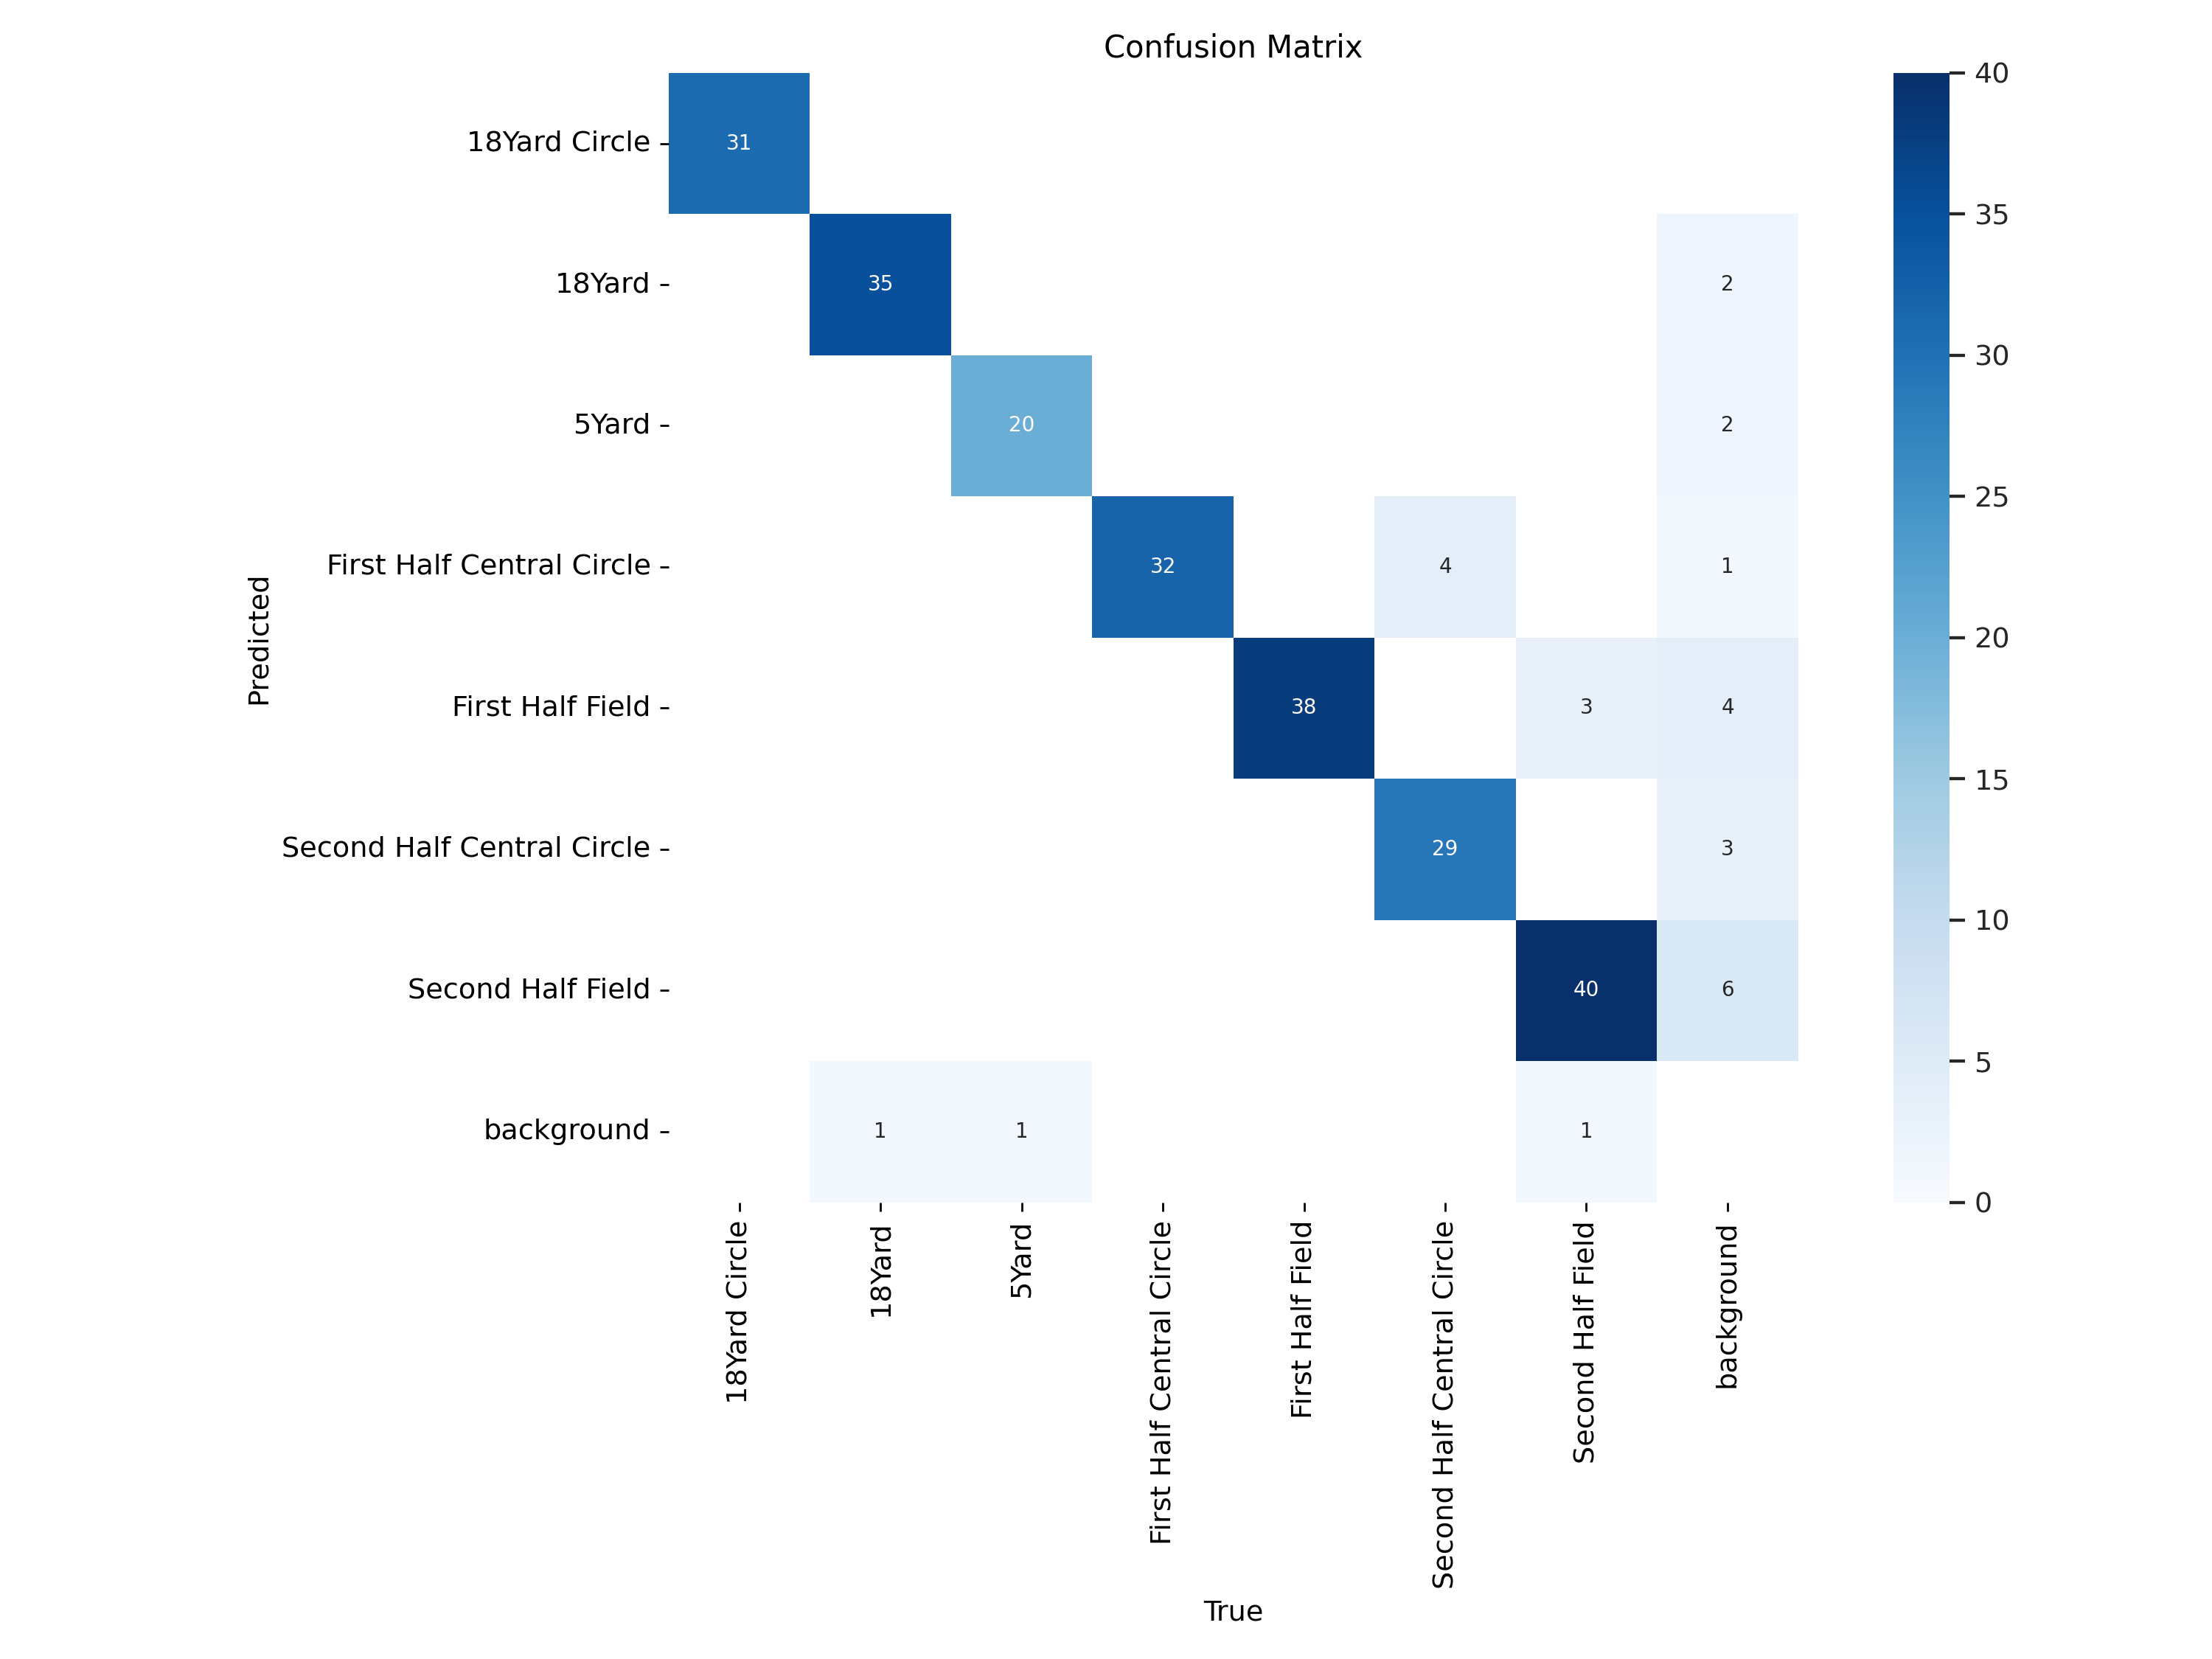

In [15]:
from IPython.display import display,Image
img_path="/content/runs/segment/train3/confusion_matrix.png"
display(Image(img_path , width=800))

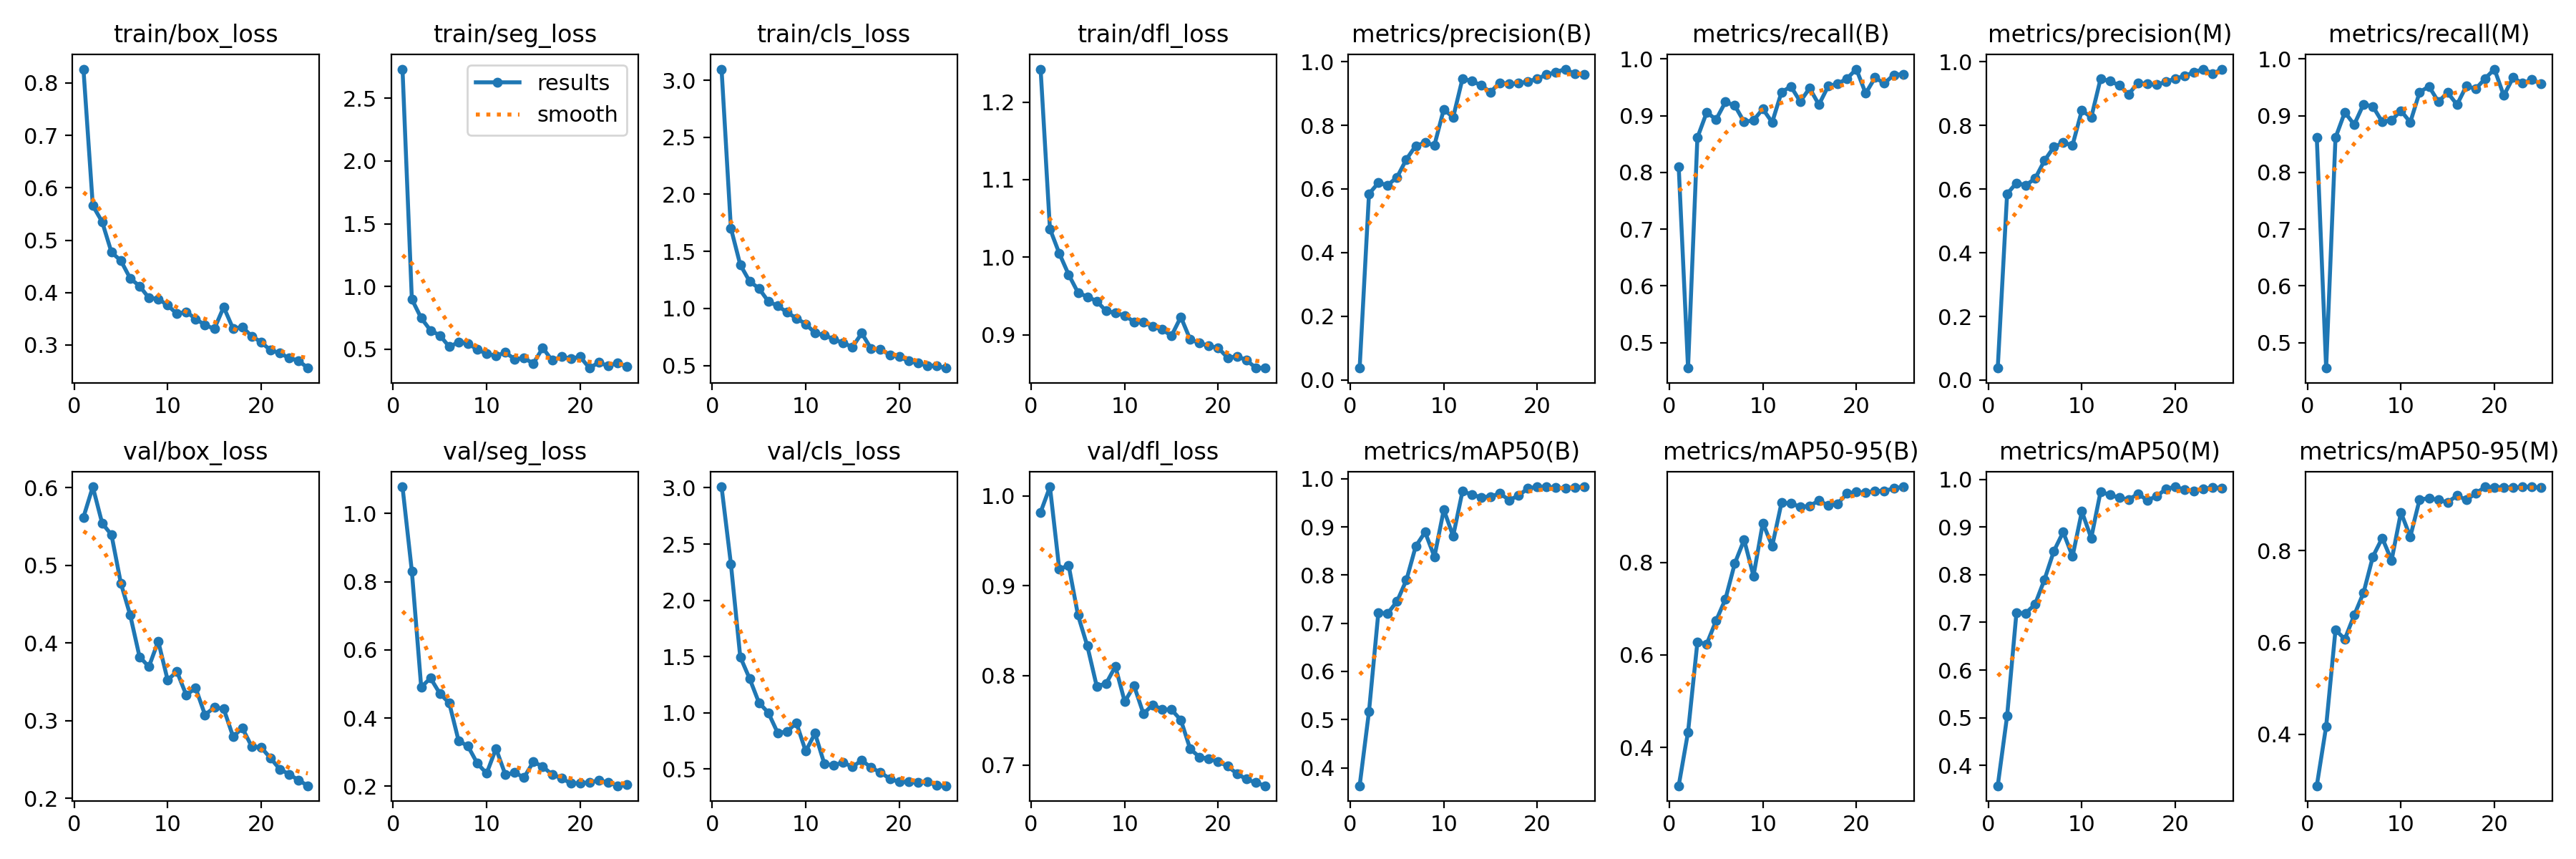

In [21]:
from IPython.display import display,Image
img_path2="/content/runs/segment/train3/results.png"
display(Image(img_path2 , width=900 , height=500))

In [27]:
model = YOLO("/content/runs/segment/train3/weights/best.pt")
pred=model.predict(source="/content/football-boxes-1/test/images" , conf=0.25 ,save=True)


image 1/31 /content/football-boxes-1/test/images/ArsTot_mp4-18_jpg.rf.55e360bbbec9190a2504726f91cec0f8.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 19.7ms
image 2/31 /content/football-boxes-1/test/images/ArsTot_mp4-21_jpg.rf.403a2af1eecf8d524888ee791b87d3c8.jpg: 640x640 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 16.8ms
image 3/31 /content/football-boxes-1/test/images/ArsTot_mp4-25_jpg.rf.cd8c474be94344acef17a71a33e37963.jpg: 640x640 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 16.2ms
image 4/31 /content/football-boxes-1/test/images/ArsTot_mp4-8_jpg.rf.9db7e5390ad83907d8a9068606d418a6.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 2 Second Half Fields, 16.2ms
image 5/31 /content/football-boxes-1/test/i

In [28]:
os.listdir("/content/runs/segment")

['predict', 'train', 'train3', 'train2']

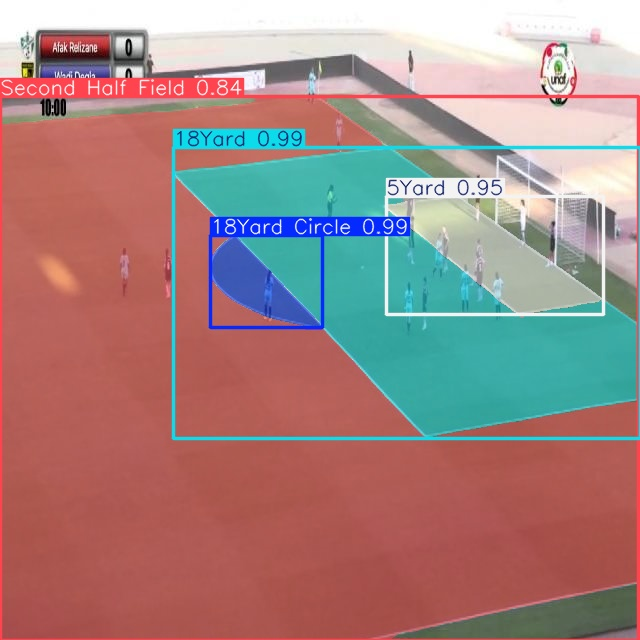

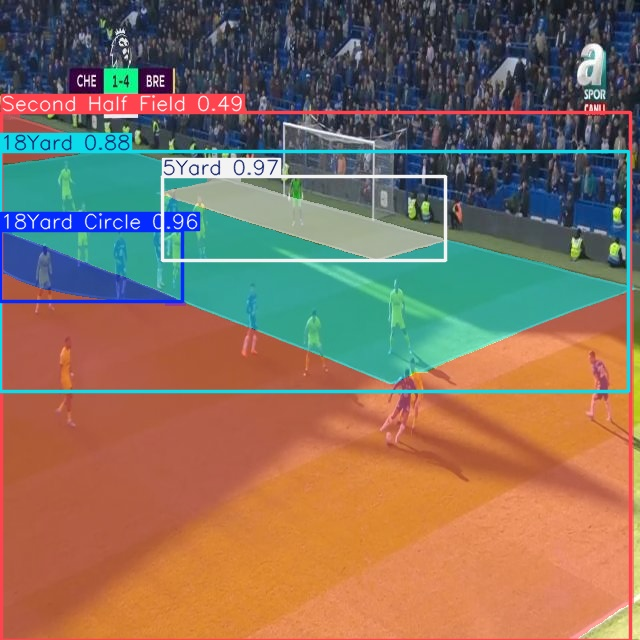

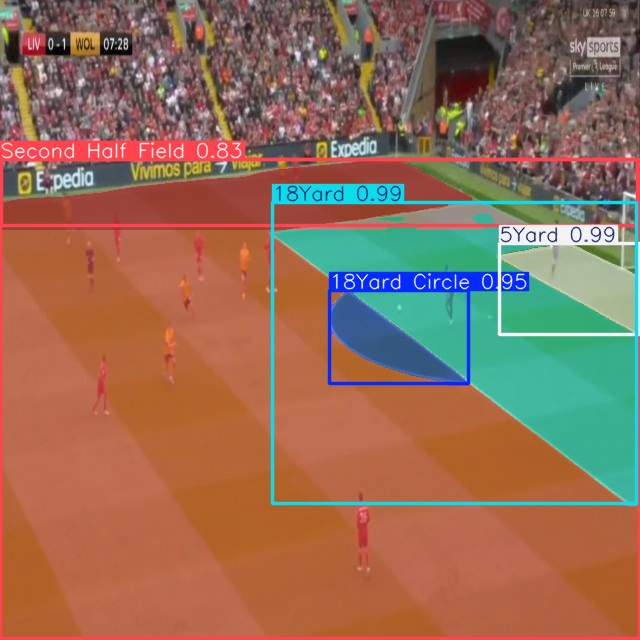

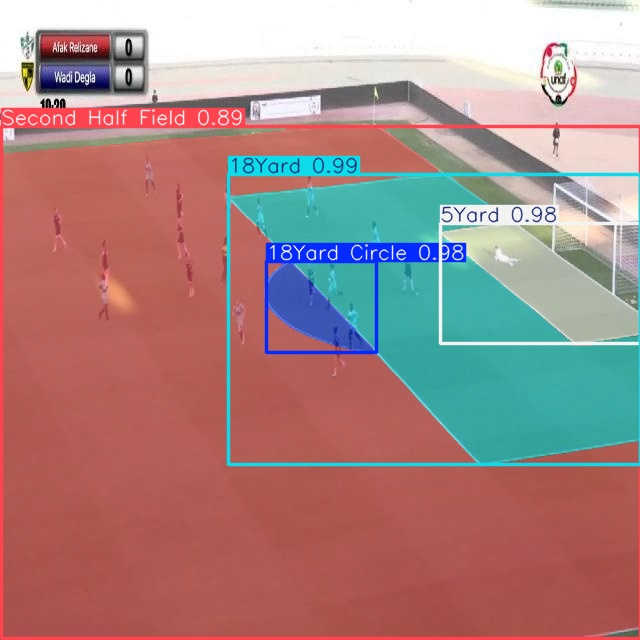

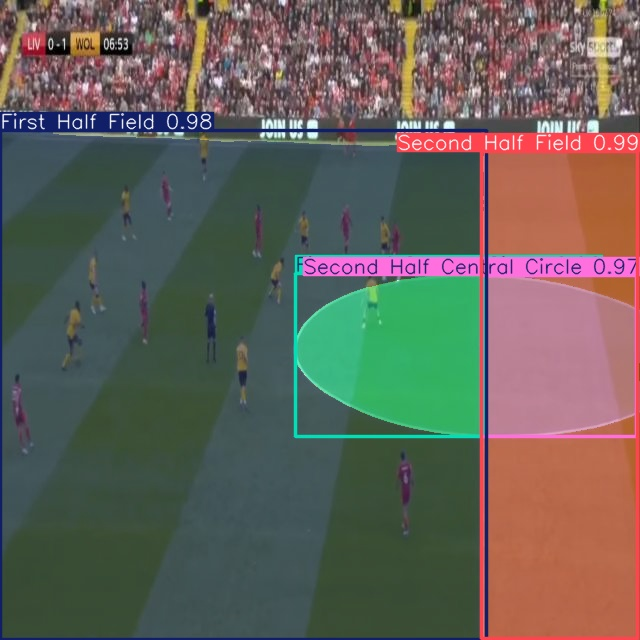

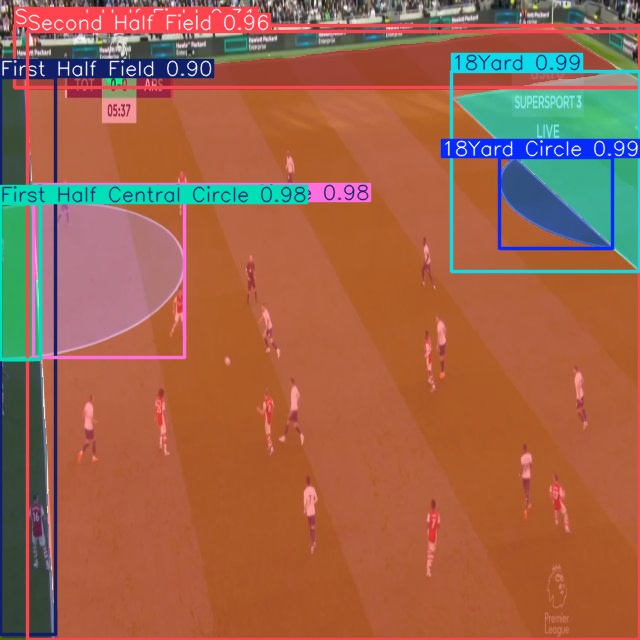

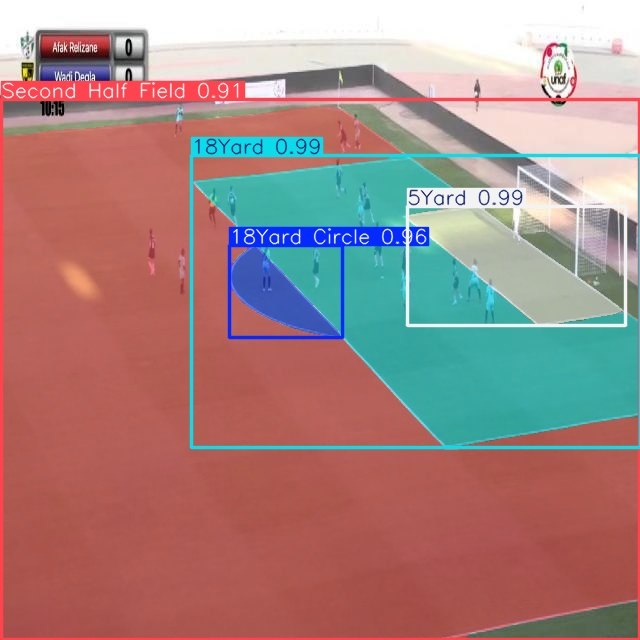

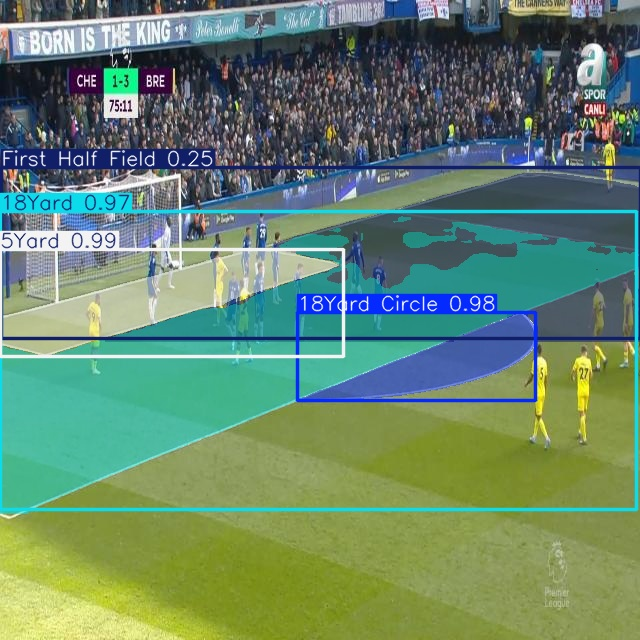

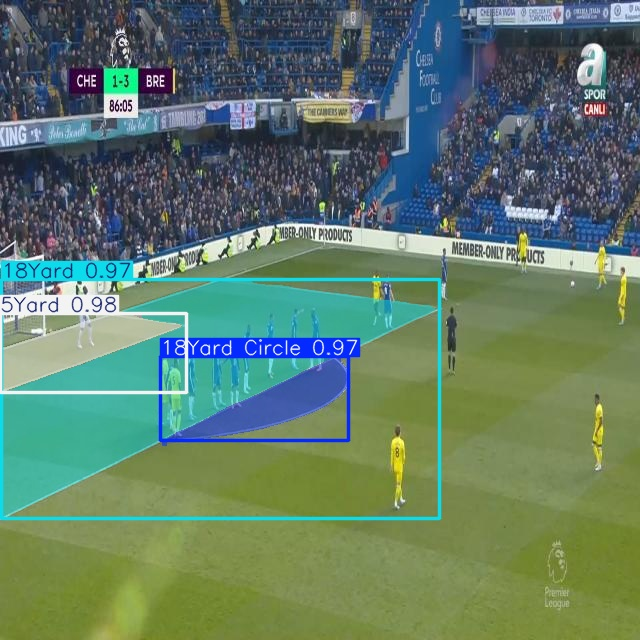

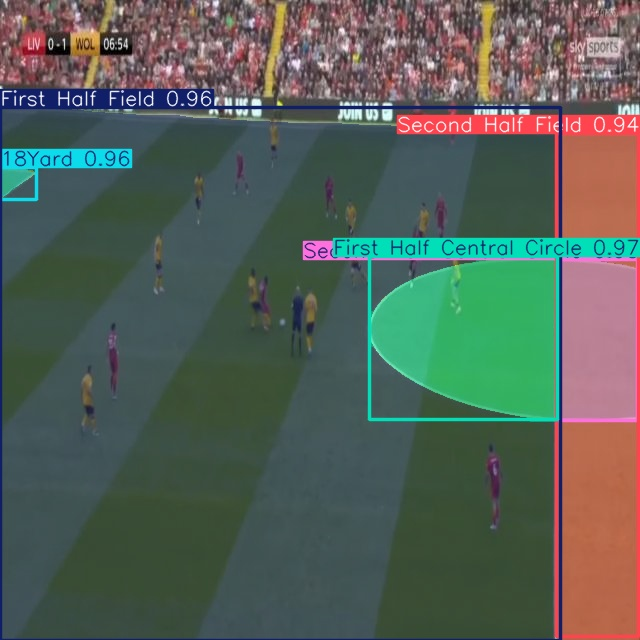

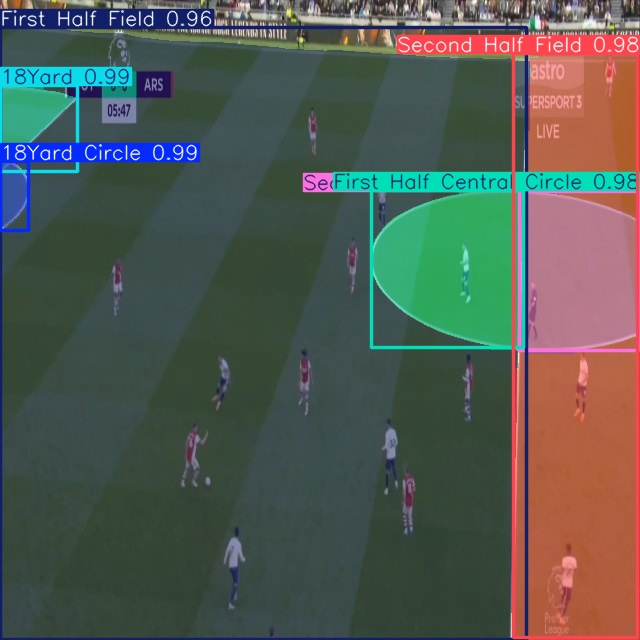

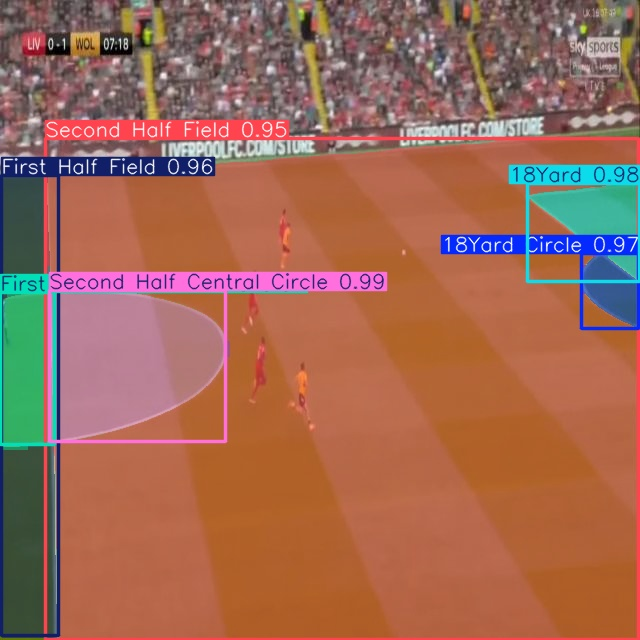

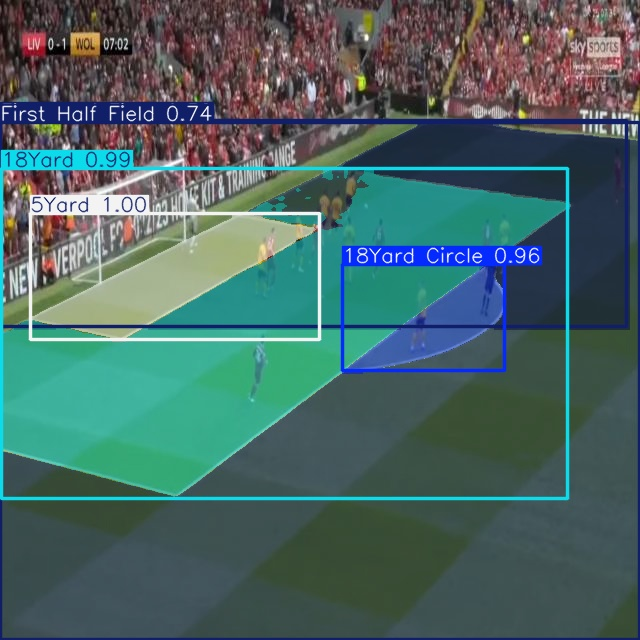

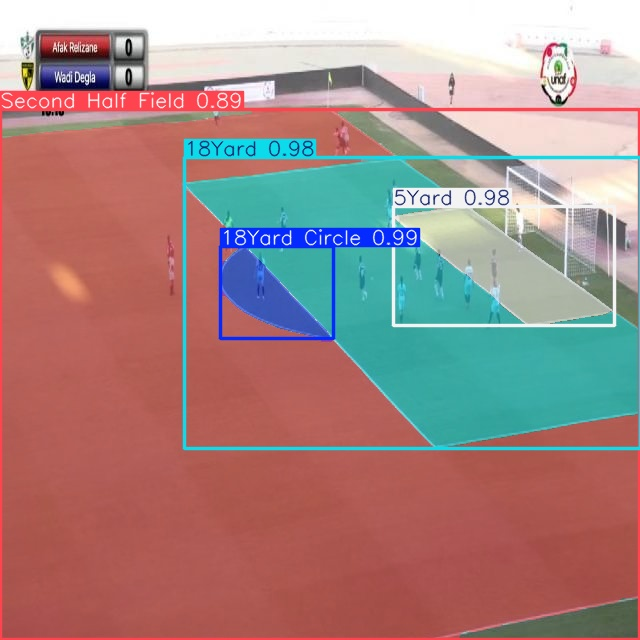

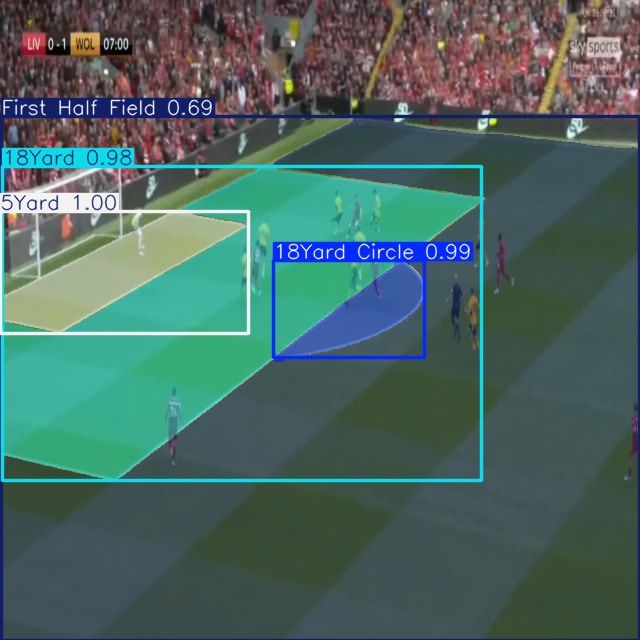

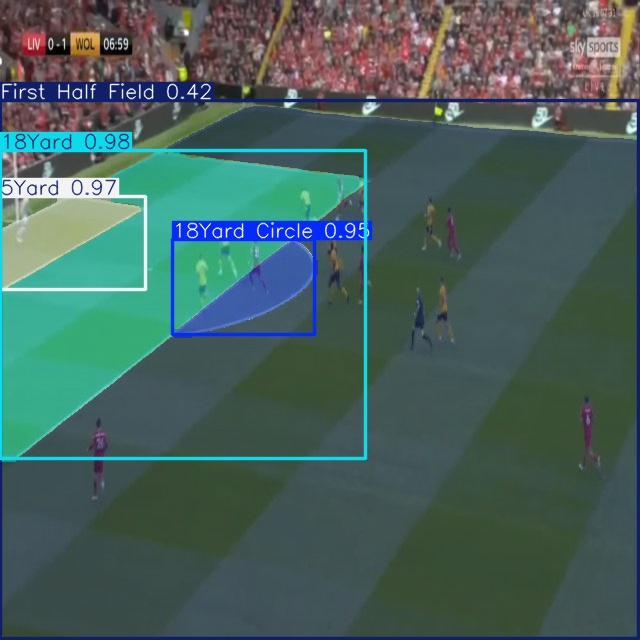

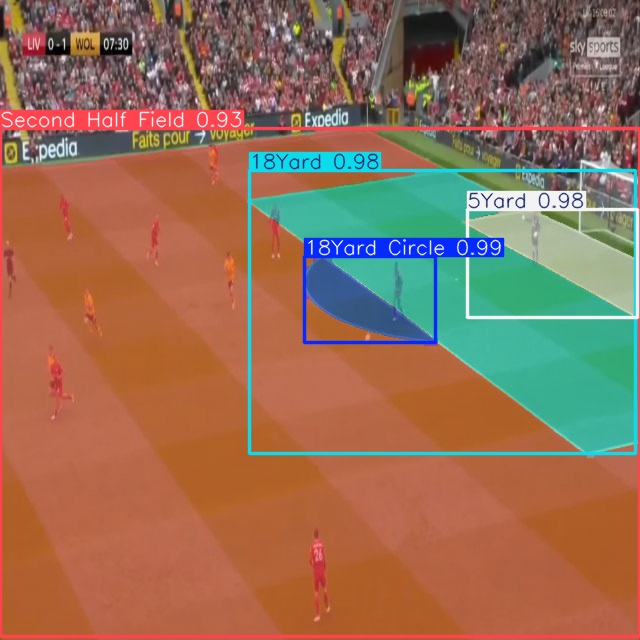

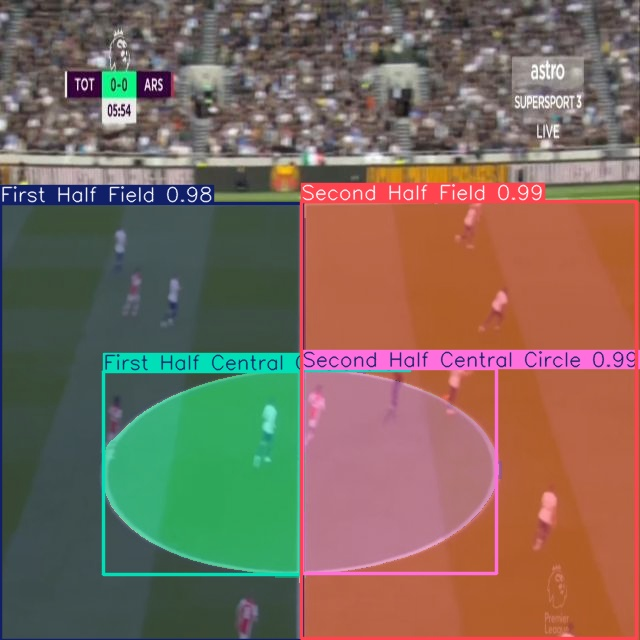

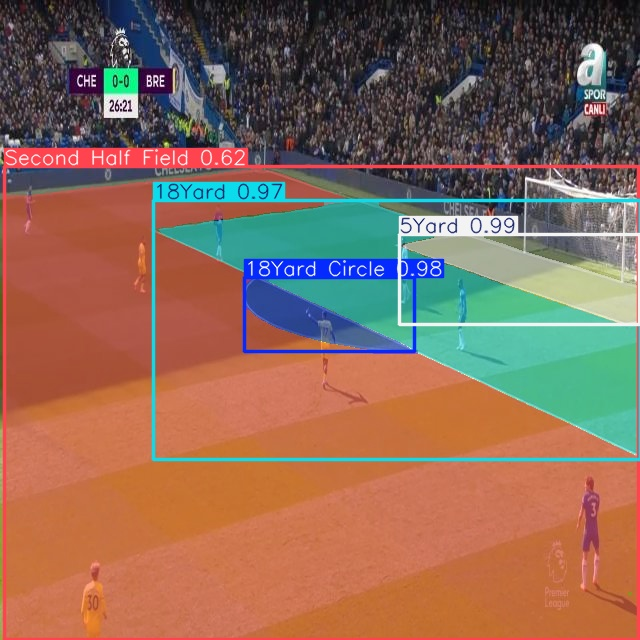

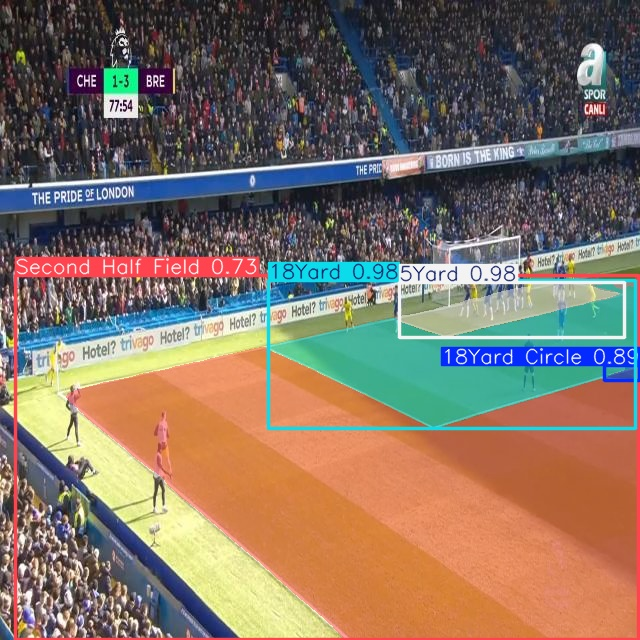

In [31]:
import glob
from IPython.display import display,Image

for image_path in glob.glob("/content/runs/segment/predict/*.jpg")[:20] :
  display(Image(filename=image_path))
  print("\n")